#          Sentiment Analysis of “The Lion King (2019)” Movie Reviews

## Initial Imports 

In [646]:
import requests
import time

## Creating header for review

In [647]:
headers = {'Referer':'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user','User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36','X-Requested-With':'XMLHttpRequest',}

In [648]:
headers

{'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
 'X-Requested-With': 'XMLHttpRequest'}

In [649]:
url ='https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user' 

## Initial payload parameters  

In [650]:
payload = {'direction': 'next','endCursor': '','startCursor': ''}

## Creating session Object

In [651]:
s = requests.Session() 

## Code to fetch 1page review

In [652]:
r = s.get(url, headers=headers, params=payload)    # GET Call 
data = r.json()

In [653]:
data

{'pageInfo': {'hasNextPage': True,
  'hasPreviousPage': False,
  'endCursor': 'eyJyZWFsbV91c2VySWQiOiJGYW5kYW5nb180MDJkYzM2ZS01MWI0LTQ4OTQtOWNhZi04MzNjMjkzMGUxMGYiLCJlbXNJZCI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZV9UIiwiY3JlYXRlRGF0ZSI6IjIwMTktMDgtMjNUMDU6Mjk6MjMuNTMzWiJ9',
  'startCursor': None},
 'reviews': [{'rating': 'STAR_3_5',
   'review': 'The truth is, they did not need to make this movie.  However, if you go and see it, you may like it for the nostalgia.',
   'displayName': 'Tristan S',
   'displayImageUrl': None,
   'isVerified': True,
   'isSuperReviewer': False,
   'hasSpoilers': False,
   'hasProfanity': False,
   'createDate': '2019-08-23T11:17:57.888Z',
   'updateDate': '2019-08-23T11:17:57.888Z',
   'user': {'userId': '26aeeff4-2e5b-42cd-b09b-0759a77d7313',
    'realm': 'Fandango',
    'displayName': 'Tristan S',
    'accountLink': None},
   'score': 3.5,
   'timeFromCreat

## Loop function for pulling out 3000 reviews from 300 pages

In [36]:
# using 3000 records
theLionKing_reviews=[]
endCursor= ''
startCursor= ''
for i in range(300):
    #payload initialization
    payload = {'direction':'next','endCursor': endCursor ,'startCursor': startCursor ,}
    #time interval of 8secs
    time.sleep(5) 
    #getting the review data in an order.
    r= s.get(url, params=payload, headers=headers)
    data = r.json()
    theLionKing_reviews = theLionKing_reviews + data['reviews']
    endCursor = data['pageInfo']['endCursor']
    startCursor = data['pageInfo']['startCursor']

theLionKing_reviews

[{'rating': 'STAR_2_5',
  'review': 'technically wonderful but the story needed a little help',
  'displayName': 'Martin P',
  'displayImageUrl': None,
  'isVerified': False,
  'isSuperReviewer': False,
  'hasSpoilers': False,
  'hasProfanity': False,
  'createDate': '2019-08-20T12:35:11.695Z',
  'updateDate': '2019-08-20T12:35:11.695Z',
  'user': {'userId': 'a4ce1fae-7857-4782-a98a-465d044468e0',
   'realm': 'Fandango',
   'displayName': 'Martin P',
   'accountLink': None},
  'score': 2.5,
  'timeFromCreation': '26m ago'},
 {'rating': 'STAR_5',
  'review': 'Loved it nothing I didn’t liked',
  'displayName': 'JOYCELYN H',
  'displayImageUrl': None,
  'isVerified': True,
  'isSuperReviewer': False,
  'hasSpoilers': False,
  'hasProfanity': False,
  'createDate': '2019-08-20T12:04:21.090Z',
  'updateDate': '2019-08-20T12:04:21.090Z',
  'user': {'userId': '1648BEE2-1B1C-4902-928B-E02618F3B271',
   'realm': 'Fandango',
   'displayName': 'JOYCELYN H',
   'accountLink': None},
  'score': 5,


Type data in which reviews are extracted

In [654]:
type(theLionKing_reviews)

list

Saving the given data in "json" format as backup

In [655]:
import json
with open('theLionKing_reviews.json', 'w', encoding='utf-8') as f:
    json.dump(theLionKing_reviews, f, ensure_ascii=False, indent=4)

### Imports for other text preprocessing and classification

In [2]:
import urllib.request as url
from bs4 import BeautifulSoup as bs
import re
import requests
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(123)

checking the no of reviews in the data

In [657]:
len(theLionKing_reviews)

3000

### converting JSON data to pandas data

In [658]:
theLionKing_reviews

[{'rating': 'STAR_2_5',
  'review': 'technically wonderful but the story needed a little help',
  'displayName': 'Martin P',
  'displayImageUrl': None,
  'isVerified': False,
  'isSuperReviewer': False,
  'hasSpoilers': False,
  'hasProfanity': False,
  'createDate': '2019-08-20T12:35:11.695Z',
  'updateDate': '2019-08-20T12:35:11.695Z',
  'user': {'userId': 'a4ce1fae-7857-4782-a98a-465d044468e0',
   'realm': 'Fandango',
   'displayName': 'Martin P',
   'accountLink': None},
  'score': 2.5,
  'timeFromCreation': '26m ago'},
 {'rating': 'STAR_5',
  'review': 'Loved it nothing I didn’t liked',
  'displayName': 'JOYCELYN H',
  'displayImageUrl': None,
  'isVerified': True,
  'isSuperReviewer': False,
  'hasSpoilers': False,
  'hasProfanity': False,
  'createDate': '2019-08-20T12:04:21.090Z',
  'updateDate': '2019-08-20T12:04:21.090Z',
  'user': {'userId': '1648BEE2-1B1C-4902-928B-E02618F3B271',
   'realm': 'Fandango',
   'displayName': 'JOYCELYN H',
   'accountLink': None},
  'score': 5,


In [659]:
from pandas.io.json import json_normalize
data =theLionKing_reviews

lionking_dt = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

lionking_dt    

,rating,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,user.userId,user.realm,user.displayName,user.accountLink
0,STAR_2_5,technically wonderful but the story needed a l...,Martin P,None,False,False,False,False,2019-08-20T12:35:11.695Z,2019-08-20T12:35:11.695Z,2.5,26m ago,a4ce1fae-7857-4782-a98a-465d044468e0,Fandango,Martin P,None
1,STAR_5,Loved it nothing I didn’t liked,JOYCELYN H,None,True,False,False,False,2019-08-20T12:04:21.090Z,2019-08-20T12:04:21.090Z,5.0,57m ago,1648BEE2-1B1C-4902-928B-E02618F3B271,Fandango,JOYCELYN H,None
2,STAR_2_5,With the exception of the impressive look of t...,Rod,None,False,False,False,False,2019-08-20T11:29:43.429Z,2019-08-20T11:29:43.429Z,2.5,2h ago,e2c36321-3231-4518-a401-3fe700cd5e72,Fandango,Rod,None
3,STAR_4,I am really not a fan of Beyonc and I believe ...,Kendra W,None,True,False,False,False,2019-08-20T10:32:46.322Z,2019-08-20T10:32:46.322Z,4.0,2h ago,d2bb6feb-ff20-453b-ac98-c81dc54f7c02,Fandango,Kendra W,None
4,STAR_2,Daft - its meant to be a cartoon,Samantha J,None,False,False,False,False,2019-08-20T09:33:53.116Z,2019-08-20T09:33:53.124Z,2.0,3h ago,978206092,RT,Samantha J,/user/id/978206092
5,STAR_4_5,Beautifully made movie. Absolutely loved this...,CAROLINE N,None,True,False,False,False,2019-08-20T08:59:12.124Z,2019-08-20T08:59:12.124Z,4.5,4h ago,d074a0cb-e9cf-48e3-b649-f43b464efac3,Fandango,CAROLINE N,None
6,STAR_2_5,It is a beautiful film but at its core it is a...,None,None,False,False,False,False,2019-08-20T08:24:51.365Z,2019-08-20T08:24:51.365Z,2.5,5h ago,260236931,RT,None,/user/id/260236931
7,STAR_5,Super cool graphics made me super emotional 12...,Katie,None,True,False,False,False,2019-08-20T06:24:25.399Z,2019-08-20T06:24:25.399Z,5.0,7h ago,0848C812-6099-4C3B-B7DA-0B1E344A51CD,Fandango,Katie,None
8,STAR_5,Amazing! Loved it from beginning to end 💕,LizzySki,None,True,False,False,False,2019-08-20T05:59:23.325Z,2019-08-20T05:59:23.325Z,5.0,7h ago,7B4CAB0B-A937-46BE-9D17-1582AF31C0FC,Fandango,LizzySki,None
9,STAR_5,Beautiful movie.... Master-crafted....lives up...,Thomas M,https://graph.facebook.com/v3.3/10152785467879...,False,False,False,False,2019-08-20T05:33:49.812Z,2019-08-20T05:33:49.812Z,5.0,7h ago,978205958,RT,Thomas M,/user/id/978205958


In [660]:
lionking_dt.to_csv("lionking_review_data.csv",header=True,index=False)

In [3]:
#reading the saved initial 3000 reviews into the notebook
lionking_dt=pd.read_csv("lionking_review_data.csv")

# Exploratory Data Analysis  

In [4]:
#reading the first five records
lionking_dt.head()

,rating,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,user.userId,user.realm,user.displayName,user.accountLink
0,STAR_2_5,technically wonderful but the story needed a l...,Martin P,NaN,False,False,False,False,2019-08-20T12:35:11.695Z,2019-08-20T12:35:11.695Z,2.5,26m ago,a4ce1fae-7857-4782-a98a-465d044468e0,Fandango,Martin P,NaN
1,STAR_5,Loved it nothing I didn’t liked,JOYCELYN H,NaN,True,False,False,False,2019-08-20T12:04:21.090Z,2019-08-20T12:04:21.090Z,5.0,57m ago,1648BEE2-1B1C-4902-928B-E02618F3B271,Fandango,JOYCELYN H,NaN
2,STAR_2_5,With the exception of the impressive look of t...,Rod,NaN,False,False,False,False,2019-08-20T11:29:43.429Z,2019-08-20T11:29:43.429Z,2.5,2h ago,e2c36321-3231-4518-a401-3fe700cd5e72,Fandango,Rod,NaN
3,STAR_4,I am really not a fan of Beyonc and I believe ...,Kendra W,NaN,True,False,False,False,2019-08-20T10:32:46.322Z,2019-08-20T10:32:46.322Z,4.0,2h ago,d2bb6feb-ff20-453b-ac98-c81dc54f7c02,Fandango,Kendra W,NaN
4,STAR_2,Daft - its meant to be a cartoon,Samantha J,NaN,False,False,False,False,2019-08-20T09:33:53.116Z,2019-08-20T09:33:53.124Z,2.0,3h ago,978206092,RT,Samantha J,/user/id/978206092


In [5]:
#reading the last five records
lionking_dt.tail()

,rating,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,user.userId,user.realm,user.displayName,user.accountLink
2995,STAR_5,absolutely amazing and beautiful,renee,NaN,True,False,False,False,2019-08-02T01:23:47.315Z,2019-08-02T01:23:47.315Z,5.0,"Aug 02, 2019",F9AF8A3F-AA8D-44F5-8991-8B4F8D953790,Fandango,renee,NaN
2996,STAR_5,"Brought back fond, nostalgic memories",Satbir C,NaN,True,False,False,False,2019-08-02T01:19:51.598Z,2019-08-02T01:19:51.598Z,5.0,"Aug 02, 2019",5B2E8D7A-2A52-4A28-A71B-2B83451D145C,Fandango,Satbir C,NaN
2997,STAR_0_5,No emotions or passion in the voices,Lenny R,NaN,True,False,False,False,2019-08-02T01:03:47.746Z,2019-08-03T03:11:06.635Z,0.5,"Aug 02, 2019",372D498D-0C41-499F-AD94-ABC23CB9F416,Fandango,Lenny R,NaN
2998,STAR_5,The lesson that was taught was clearly display...,Latifa Williams,NaN,True,False,False,False,2019-08-02T00:55:52.126Z,2019-08-02T00:55:52.126Z,5.0,"Aug 02, 2019",7ADA56BB-3372-4FE3-93CE-7467C0A98005,Fandango,Latifa Williams,NaN
2999,STAR_5,this movie is amazing! visually beautiful and ...,yuran s,NaN,False,False,False,False,2019-08-02T00:52:28.414Z,2019-08-02T00:52:28.629Z,5.0,"Aug 02, 2019",978182064,RT,yuran s,/user/id/978182064


In [6]:
#gives the overall summary statistics 
lionking_dt.describe(include="all")

,rating,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,user.userId,user.realm,user.displayName,user.accountLink
count,3000,3000,2857,226,3000,3000,3000,3000,3000,3000,3000.000000,3000,3000,3000,2857,621
unique,10,2994,2455,226,2,2,2,2,3000,3000,NaN,42,3000,2,2455,621
top,STAR_5,better than the original,Facebook U,https://graph.facebook.com/v3.3/1199194030/pic...,True,False,False,False,2019-08-03T15:33:49.809Z,2019-08-06T21:12:18.325Z,NaN,"Aug 05, 2019",978187797,Fandango,Facebook U,/user/id/912176906
freq,1364,2,13,1,2153,2999,2998,2967,1,1,NaN,318,1,2379,13,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.926000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.304131,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
#information about the attributes like total frequency number of each attribute along with the data type 
lionking_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
rating              3000 non-null object
review              3000 non-null object
displayName         2857 non-null object
displayImageUrl     226 non-null object
isVerified          3000 non-null bool
isSuperReviewer     3000 non-null bool
hasSpoilers         3000 non-null bool
hasProfanity        3000 non-null bool
createDate          3000 non-null object
updateDate          3000 non-null object
score               3000 non-null float64
timeFromCreation    3000 non-null object
user.userId         3000 non-null object
user.realm          3000 non-null object
user.displayName    2857 non-null object
user.accountLink    621 non-null object
dtypes: bool(4), float64(1), object(11)
memory usage: 293.1+ KB


In [8]:
#checking for the type of data
lionking_dt.dtypes

rating               object
review               object
displayName          object
displayImageUrl      object
isVerified             bool
isSuperReviewer        bool
hasSpoilers            bool
hasProfanity           bool
createDate           object
updateDate           object
score               float64
timeFromCreation     object
user.userId          object
user.realm           object
user.displayName     object
user.accountLink     object
dtype: object

In [9]:
#column names
lionking_dt.columns

Index(['rating', 'review', 'displayName', 'displayImageUrl', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'createDate',
       'updateDate', 'score', 'timeFromCreation', 'user.userId', 'user.realm',
       'user.displayName', 'user.accountLink'],
      dtype='object')

## Value counts

In [10]:
#checking for distribution of data in each columns and their respective counts.
for i in lionking_dt.columns.values:
    print (i)
    print (pd.value_counts(lionking_dt[i].values,))
    print (len(lionking_dt[i].unique()))
    print ("****************************************")

rating
STAR_5      1364
STAR_4       438
STAR_3       281
STAR_3_5     199
STAR_4_5     176
STAR_2       175
STAR_2_5     125
STAR_0_5     108
STAR_1        86
STAR_1_5      48
dtype: int64
10
****************************************
review
better than the original                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [11]:
lionking_dt.sample()

,rating,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,user.userId,user.realm,user.displayName,user.accountLink
2948,STAR_5,Absolutely loved it!,Patricia M,NaN,True,False,False,False,2019-08-02T04:28:45.070Z,2019-08-02T04:28:45.070Z,5.0,"Aug 02, 2019",1FEBD044-F96E-4D53-96ED-BD3FC0E8582C,Fandango,Patricia M,NaN


# Sentiment(Target)

In [12]:
#extracting our target feature from rating
lionking_dt['sentiment'] = np.where(lionking_dt['score']>3, 1, 0)

### Since a new feature called as Sentiment is extracted from the data there is no need for 
        1. rating
        2. score
      As they both are similar data and are highly correlated as seen in the value counts

Dropping the feature "rating" only because i want to check if there is any use during EDA with the score feature and if there isn't 

In [13]:
#dropping rating after extraction
lionking_dt=lionking_dt.drop(labels=['rating'], axis=1)

### Dealing with the time data

In [14]:
#backup-1
#lionking_dt = pd.read_csv("backup_1.csv")

In [15]:
#random sample of the entire data
lionking_dt.sample()

,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,user.userId,user.realm,user.displayName,user.accountLink,sentiment
317,Same story line as the animated version. A few...,Faye,NaN,True,False,False,False,2019-08-16T18:36:43.820Z,2019-08-16T18:36:43.820Z,4.0,4d ago,0606123c-e824-4833-beaf-51a1b5db6132,Fandango,Faye,NaN,1


### createDate feature extraction

In [16]:
#extraction of year, month and date
lionking_dt['createDate'] = pd.to_datetime(lionking_dt['createDate'])
lionking_dt['create_year'], lionking_dt['create_month'], lionking_dt['Create_day'] = lionking_dt['createDate'].dt.year, lionking_dt['createDate'].dt.month, lionking_dt['createDate'].dt.day
lionking_dt

,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,user.userId,user.realm,user.displayName,user.accountLink,sentiment,create_year,create_month,Create_day
0,technically wonderful but the story needed a l...,Martin P,NaN,False,False,False,False,2019-08-20 12:35:11.695000+00:00,2019-08-20T12:35:11.695Z,2.5,26m ago,a4ce1fae-7857-4782-a98a-465d044468e0,Fandango,Martin P,NaN,0,2019,8,20
1,Loved it nothing I didn’t liked,JOYCELYN H,NaN,True,False,False,False,2019-08-20 12:04:21.090000+00:00,2019-08-20T12:04:21.090Z,5.0,57m ago,1648BEE2-1B1C-4902-928B-E02618F3B271,Fandango,JOYCELYN H,NaN,1,2019,8,20
2,With the exception of the impressive look of t...,Rod,NaN,False,False,False,False,2019-08-20 11:29:43.429000+00:00,2019-08-20T11:29:43.429Z,2.5,2h ago,e2c36321-3231-4518-a401-3fe700cd5e72,Fandango,Rod,NaN,0,2019,8,20
3,I am really not a fan of Beyonc and I believe ...,Kendra W,NaN,True,False,False,False,2019-08-20 10:32:46.322000+00:00,2019-08-20T10:32:46.322Z,4.0,2h ago,d2bb6feb-ff20-453b-ac98-c81dc54f7c02,Fandango,Kendra W,NaN,1,2019,8,20
4,Daft - its meant to be a cartoon,Samantha J,NaN,False,False,False,False,2019-08-20 09:33:53.116000+00:00,2019-08-20T09:33:53.124Z,2.0,3h ago,978206092,RT,Samantha J,/user/id/978206092,0,2019,8,20
5,Beautifully made movie. Absolutely loved this...,CAROLINE N,NaN,True,False,False,False,2019-08-20 08:59:12.124000+00:00,2019-08-20T08:59:12.124Z,4.5,4h ago,d074a0cb-e9cf-48e3-b649-f43b464efac3,Fandango,CAROLINE N,NaN,1,2019,8,20
6,It is a beautiful film but at its core it is a...,NaN,NaN,False,False,False,False,2019-08-20 08:24:51.365000+00:00,2019-08-20T08:24:51.365Z,2.5,5h ago,260236931,RT,NaN,/user/id/260236931,0,2019,8,20
7,Super cool graphics made me super emotional 12...,Katie,NaN,True,False,False,False,2019-08-20 06:24:25.399000+00:00,2019-08-20T06:24:25.399Z,5.0,7h ago,0848C812-6099-4C3B-B7DA-0B1E344A51CD,Fandango,Katie,NaN,1,2019,8,20
8,Amazing! Loved it from beginning to end 💕,LizzySki,NaN,True,False,False,False,2019-08-20 05:59:23.325000+00:00,2019-08-20T05:59:23.325Z,5.0,7h ago,7B4CAB0B-A937-46BE-9D17-1582AF31C0FC,Fandango,LizzySki,NaN,1,2019,8,20
9,Beautiful movie.... Master-crafted....lives up...,Thomas M,https://graph.facebook.com/v3.3/10152785467879...,False,False,False,False,2019-08-20 05:33:49.812000+00:00,2019-08-20T05:33:49.812Z,5.0,7h ago,978205958,RT,Thomas M,/user/id/978205958,1,2019,8,20


In [17]:
# frequency of distributions of sentiments in the given data
lionking_dt.sentiment.value_counts()

1    2177
0     823
Name: sentiment, dtype: int64

In [18]:
#to get time only
lionking_dt['create_time'] = lionking_dt['createDate'].dt.time

In [19]:
#to get hours, minutes, and seconds
lionking_dt[['created_hour','created_minute','created_seconds']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in lionking_dt['create_time']])

### UpdateDate feature extraction

In [20]:
##extraction of year, month and date
lionking_dt['updateDate'] = pd.to_datetime(lionking_dt['updateDate'])
lionking_dt['update_year'], lionking_dt['update_month'], lionking_dt['update_day'] = lionking_dt['updateDate'].dt.year, lionking_dt['updateDate'].dt.month, lionking_dt['updateDate'].dt.day
lionking_dt

,review,displayName,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,...,create_year,create_month,Create_day,create_time,created_hour,created_minute,created_seconds,update_year,update_month,update_day
0,technically wonderful but the story needed a l...,Martin P,NaN,False,False,False,False,2019-08-20 12:35:11.695000+00:00,2019-08-20 12:35:11.695000+00:00,2.5,...,2019,8,20,12:35:11.695000,12,35,11,2019,8,20
1,Loved it nothing I didn’t liked,JOYCELYN H,NaN,True,False,False,False,2019-08-20 12:04:21.090000+00:00,2019-08-20 12:04:21.090000+00:00,5.0,...,2019,8,20,12:04:21.090000,12,4,21,2019,8,20
2,With the exception of the impressive look of t...,Rod,NaN,False,False,False,False,2019-08-20 11:29:43.429000+00:00,2019-08-20 11:29:43.429000+00:00,2.5,...,2019,8,20,11:29:43.429000,11,29,43,2019,8,20
3,I am really not a fan of Beyonc and I believe ...,Kendra W,NaN,True,False,False,False,2019-08-20 10:32:46.322000+00:00,2019-08-20 10:32:46.322000+00:00,4.0,...,2019,8,20,10:32:46.322000,10,32,46,2019,8,20
4,Daft - its meant to be a cartoon,Samantha J,NaN,False,False,False,False,2019-08-20 09:33:53.116000+00:00,2019-08-20 09:33:53.124000+00:00,2.0,...,2019,8,20,09:33:53.116000,9,33,53,2019,8,20
5,Beautifully made movie. Absolutely loved this...,CAROLINE N,NaN,True,False,False,False,2019-08-20 08:59:12.124000+00:00,2019-08-20 08:59:12.124000+00:00,4.5,...,2019,8,20,08:59:12.124000,8,59,12,2019,8,20
6,It is a beautiful film but at its core it is a...,NaN,NaN,False,False,False,False,2019-08-20 08:24:51.365000+00:00,2019-08-20 08:24:51.365000+00:00,2.5,...,2019,8,20,08:24:51.365000,8,24,51,2019,8,20
7,Super cool graphics made me super emotional 12...,Katie,NaN,True,False,False,False,2019-08-20 06:24:25.399000+00:00,2019-08-20 06:24:25.399000+00:00,5.0,...,2019,8,20,06:24:25.399000,6,24,25,2019,8,20
8,Amazing! Loved it from beginning to end 💕,LizzySki,NaN,True,False,False,False,2019-08-20 05:59:23.325000+00:00,2019-08-20 05:59:23.325000+00:00,5.0,...,2019,8,20,05:59:23.325000,5,59,23,2019,8,20
9,Beautiful movie.... Master-crafted....lives up...,Thomas M,https://graph.facebook.com/v3.3/10152785467879...,False,False,False,False,2019-08-20 05:33:49.812000+00:00,2019-08-20 05:33:49.812000+00:00,5.0,...,2019,8,20,05:33:49.812000,5,33,49,2019,8,20


In [21]:
#to get time only
lionking_dt['update_time'] = lionking_dt['updateDate'].dt.time

In [22]:
#extracting hours, minutes and seconds
lionking_dt[['updated_hour','updated_minute','updated_seconds']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in lionking_dt['update_time']])

In [23]:
#lionking_dt.to_csv("backup_2.csv",header=True,index=False)

In [24]:
#lionking_dt=pd.read_csv("backup_2.csv")

In [25]:
#column names
lionking_dt.columns

Index(['review', 'displayName', 'displayImageUrl', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'createDate',
       'updateDate', 'score', 'timeFromCreation', 'user.userId', 'user.realm',
       'user.displayName', 'user.accountLink', 'sentiment', 'create_year',
       'create_month', 'Create_day', 'create_time', 'created_hour',
       'created_minute', 'created_seconds', 'update_year', 'update_month',
       'update_day', 'update_time', 'updated_hour', 'updated_minute',
       'updated_seconds'],
      dtype='object')

## displayName         

In [26]:
#displayName distinct values
lionking_dt["displayName"].value_counts()

Facebook U    13
Google        12
Jennifer       8
Mary           7
Stephanie      7
              ..
Mone't B       1
Bubby          1
Edmund G       1
Kim M          1
Tammilinda     1
Name: displayName, Length: 2455, dtype: int64

In [27]:
#total number of unique names
lionking_dt["displayName"].nunique()

2455

In [28]:
#checking for missing values
lionking_dt["displayName"].isna().sum()

143

In [29]:
#filling the missing values with noname
lionking_dt["displayName"].fillna("NoName",inplace=True)

In [30]:
lionking_dt["displayName"].isna().sum()

0

In [31]:
#contengency table between displayname and sentiment
pd.crosstab(lionking_dt.displayName, lionking_dt.sentiment)

sentiment,0,1
displayName,,
.,0,1
4 of 5,0,1
90s Baby,1,0
A R,1,0
AA,0,1
AB,0,2
AHMAD,0,1
AJ,0,1
AJ M,0,1


In [32]:
#subsetting noname data
displayname_noname_dt = lionking_dt[(lionking_dt['displayName']=='NoName')]

In [33]:
#contengency table for noname data and sentiment feature
pd.crosstab(displayname_noname_dt.displayName, displayname_noname_dt.sentiment)

sentiment,0,1
displayName,,
NoName,69,74


## In displayName :
    1. There are few names which repeated in the datasets as they seem to be popular names which user might have used.
    2. Out of all the given data of names there are 2460 out of 3000 are unique as that represents high cardinality.
    3. There are 142 records with missing display names so instead of removing since it might be usefull for future extraction of features i imputed it with the word "nonames" 
    4. Here the the replaced null values with "NoName are also distributed eaually among the sentiment so there is no trend among the feature Displayname

In [34]:
#lionking_dt=lionking_dt.drop(labels=['displayName'], axis=1)

## displayImageUrl

In [35]:
lionking_dt["displayImageUrl"].value_counts()

https://graph.facebook.com/v3.3/1199194030/picture           1
https://graph.facebook.com/v3.3/1005210522/picture           1
https://graph.facebook.com/v3.3/10205600503904276/picture    1
https://graph.facebook.com/v3.3/2852735448076976/picture     1
https://graph.facebook.com/v3.3/2217316348490764/picture     1
                                                            ..
https://graph.facebook.com/v3.3/2415915955168553/picture     1
https://graph.facebook.com/v3.3/1831438542/picture           1
https://graph.facebook.com/v3.3/100000499243682/picture      1
https://graph.facebook.com/v3.3/100001022330782/picture      1
https://graph.facebook.com/v3.3/2383128525110110/picture     1
Name: displayImageUrl, Length: 226, dtype: int64

In [36]:
#unique dataImageUrl values
lionking_dt["displayImageUrl"].nunique()

226

In [37]:
#checking for the missing values
lionking_dt["displayImageUrl"].isna().sum()

2774

In [38]:
#lionking_dt=lionking_dt.drop(labels=['displayImageUrl'], axis=1)

## In diplayImageUrl
    1. There are 226 unique records, which seems to be a good number considering that there are 3000 records
    2. When we checked missing values there are 92% values missing which makes this feature less important in our quest for predicting so its better to remove this feature.

************************

## isVerified
    This tells whether the user has verified his/her account before giving the review or not

    1. Expecting to see a trend in reviews between the customers who are verified and the customers who aren't verified

In [39]:
#frequency distribution of isVerified
lionking_dt["isVerified"].value_counts()

True     2153
False     847
Name: isVerified, dtype: int64

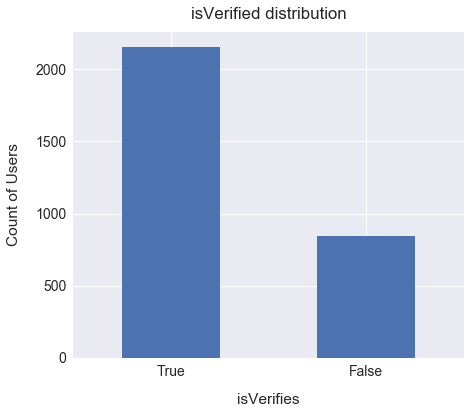

In [41]:
#barplot representing distribution of is verified with sentiment
import seaborn as sns
sns.set(font_scale=1.4)
lionking_dt['isVerified'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("isVerifies", labelpad=14)
plt.ylabel("Count of Users", labelpad=14)
plt.title("isVerified distribution", y=1.02);

In [42]:
#no of unique values in isVerified
lionking_dt["isVerified"].nunique()

2

In [43]:
#checking for the null values
lionking_dt["isVerified"].isna().sum()

0

In [44]:
#correalion table 
pd.crosstab(lionking_dt.isVerified, lionking_dt.sentiment)

sentiment,0,1
isVerified,,
False,400,447
True,423,1730


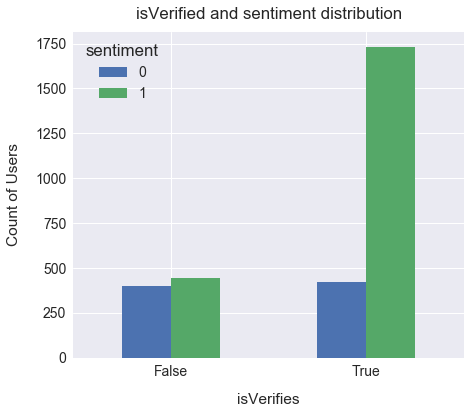

In [45]:
#distribution of isVerified in association with sentiment
sns.set(font_scale=1.4)
pd.crosstab(lionking_dt.isVerified, lionking_dt.sentiment).plot(kind='bar',figsize=(7, 6), rot=0)

plt.xlabel("isVerifies", labelpad=14)
plt.ylabel("Count of Users", labelpad=14)
plt.title("isVerified and sentiment distribution", y=1.02);

In [46]:
import scipy.stats as ss

In [47]:
#Used this feature to check for the correlation between categorical column on our target feature

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [48]:
#correlation percentage with the help of chi_square test
cramers_v(lionking_dt.isVerified, lionking_dt.sentiment)

0.27684543596385874

## From this we can see that :-
    1. isVerified column is boolean format.
    2. The true & false in this feature are sparsly present in these 3000 records as trues are present in 72% of the record and 18% of false.
    3. isVerified according to me is abt whether the given user has verified his profile or not while giving the data
    4. crosstab for the isVerified and sentiment gives the contengency table which tells that out of 840 not verified records 401 records gave negative feedback and 439 gave positive feed.
    5. In the same way as above out of verified 2160 records 431 gave negative feedback and 1729 gave positive feedback.
    6. Cramers_v value of 27.7% tells that is verified is somewhat not helping in predicting our target in a better way.
## So along with the review data, movie tickets selling comapany can extract and the "isVerified" users info and place them in the order at he beginning so that since most revies are postive there is high probability that tickets might sell through their website.

***********************************************************

## isSuperReviewer

In [49]:
#frequency distribution
lionking_dt["isSuperReviewer"].value_counts()

False    2999
True        1
Name: isSuperReviewer, dtype: int64

In [50]:
#no of unique values
lionking_dt["isSuperReviewer"].nunique()

2

In [51]:
#missing values
lionking_dt["isSuperReviewer"].isna().sum()

0

In [52]:
#correlation table
pd.crosstab(lionking_dt.isSuperReviewer, lionking_dt.sentiment)

sentiment,0,1
isSuperReviewer,,
False,822,2177
True,1,0


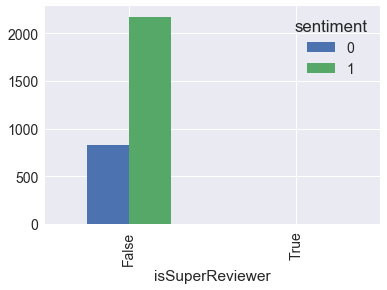

In [53]:
#distribution of is superviewer with respect to sentiment
pd.crosstab(lionking_dt.isSuperReviewer, lionking_dt.sentiment).plot(kind="bar")

In [54]:
#correaltion with our target attribute sentiment
cramers_v(lionking_dt.isSuperReviewer, lionking_dt.sentiment)

0.0

## In isSuperReviewer:
    1. the data is highly sparse as there is one record who is a super reviewer
    2. 2999 records are not superreviewers
    3. There is not much help that online ticket booking comapany can learn and extract information from this feature to their advantage

In [55]:
#lionking_dt=lionking_dt.drop(labels=['isSuperReviewer'], axis=1)

*******************

## hasSpoilers

In [56]:
#data type
lionking_dt["hasSpoilers"].dtype

dtype('bool')

In [57]:
#frequency distribution
lionking_dt["hasSpoilers"].value_counts()

False    2998
True        2
Name: hasSpoilers, dtype: int64

In [58]:
# missing values
lionking_dt["hasSpoilers"].isna().sum()

0

In [59]:
#correlation distribution table
pd.crosstab(lionking_dt.hasSpoilers, lionking_dt.sentiment)

sentiment,0,1
hasSpoilers,,
False,821,2177
True,2,0


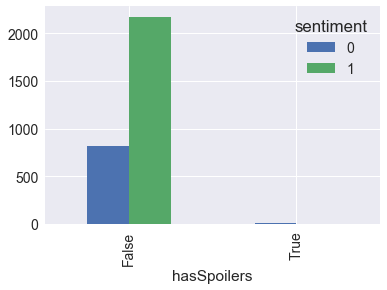

In [60]:
#distribution in associated with our target atribute
pd.crosstab(lionking_dt.hasSpoilers, lionking_dt.sentiment).plot(kind="bar")

## In hasSpoiler:
    1. the data is highly sparse as there is one record who is a super reviewer
    2. 2998 records are stating that there is no spoilers 
    3. But there is slight advantage if they just go with the review records with no spoilers as 2177 records out of 3000 stated postive about the movie they can still attract the customers with their postive reviews.
    4. but this feature doesnt help us in our model building for sentiment analysis so its better if we remove them.

In [61]:
#lionking_dt=lionking_dt.drop(labels=['hasSpoilers'], axis=1)

********************

## hasProfanity

In [62]:
#data type
lionking_dt["hasProfanity"].dtype

dtype('bool')

In [63]:
#value count
lionking_dt["hasProfanity"].value_counts()

False    2967
True       33
Name: hasProfanity, dtype: int64

In [64]:
# missing values
lionking_dt["hasProfanity"].isna().sum()

0

In [65]:
#distibution table with respect to our target
pd.crosstab(lionking_dt.hasProfanity, lionking_dt.sentiment)

sentiment,0,1
hasProfanity,,
False,802,2165
True,21,12


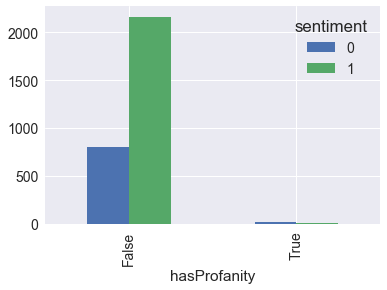

In [66]:
#bar plot for the distribution with respect to our target variable
pd.crosstab(lionking_dt.hasProfanity, lionking_dt.sentiment).plot(kind="bar")

In [67]:
#correlation with  our target attribute
cramers_v(lionking_dt.hasProfanity, lionking_dt.sentiment)

0.07994541202802681

## In has profanity:
    1. the data is highly sparse as there is 37 records who stated profanity presence and 
    2. 2967 records has no profanity stated 
    3. But there is slight advantage if they just go with the review records with no profanity as 2165 records out of 3000 stated postive about the movie they can still attract the customers with their postive reviews.
    4. This feature doesnt help us much in finding the right sentiment due its sparcity.

In [68]:
#lionking_dt=lionking_dt.drop(labels=['hasProfanity'], axis=1)

************************

## timeFromCreation

In [729]:
lionking_dt.head()

,review,displayImageUrl,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,createDate,updateDate,score,timeFromCreation,...,created_hour,created_minute,created_seconds,update_year,update_month,update_day,update_time,updated_hour,updated_minute,updated_seconds
0,technically wonderful but the story needed a l...,NaN,False,False,False,False,2019-08-20 12:35:11.695000+00:00,2019-08-20 12:35:11.695000+00:00,2.5,26m ago,...,12,35,11,2019,8,20,12:35:11.695000,12,35,11
1,Loved it nothing I didn’t liked,NaN,True,False,False,False,2019-08-20 12:04:21.090000+00:00,2019-08-20 12:04:21.090000+00:00,5.0,57m ago,...,12,4,21,2019,8,20,12:04:21.090000,12,4,21
2,With the exception of the impressive look of t...,NaN,False,False,False,False,2019-08-20 11:29:43.429000+00:00,2019-08-20 11:29:43.429000+00:00,2.5,2h ago,...,11,29,43,2019,8,20,11:29:43.429000,11,29,43
3,I am really not a fan of Beyonc and I believe ...,NaN,True,False,False,False,2019-08-20 10:32:46.322000+00:00,2019-08-20 10:32:46.322000+00:00,4.0,2h ago,...,10,32,46,2019,8,20,10:32:46.322000,10,32,46
4,Daft - its meant to be a cartoon,NaN,False,False,False,False,2019-08-20 09:33:53.116000+00:00,2019-08-20 09:33:53.124000+00:00,2.0,3h ago,...,9,33,53,2019,8,20,09:33:53.124000,9,33,53


In [69]:
#distribution for time of creation
lionking_dt["timeFromCreation"].value_counts()

Aug 05, 2019    318
Aug 04, 2019    296
Aug 03, 2019    258
Aug 06, 2019    245
Aug 02, 2019    235
Aug 08, 2019    229
Aug 07, 2019    197
Aug 12, 2019    158
Aug 11, 2019    133
Aug 09, 2019    127
Aug 13, 2019    125
Aug 10, 2019    115
6d ago          104
5d ago           94
2d ago           88
3d ago           87
4d ago           71
1d ago           45
23h ago          10
Aug 19, 2019      6
12h ago           6
Aug 14, 2019      6
11h ago           5
22h ago           5
8h ago            4
10h ago           4
18h ago           4
7h ago            3
17h ago           3
16h ago           3
20h ago           2
2h ago            2
13h ago           2
19h ago           2
15h ago           1
57m ago           1
26m ago           1
3h ago            1
4h ago            1
21h ago           1
9h ago            1
5h ago            1
Name: timeFromCreation, dtype: int64

not much information or trends from the value counts on the feature "time from creation"

In [70]:
# no of unique values
lionking_dt["timeFromCreation"].nunique()

42

In [71]:
#checking for the null value
lionking_dt["timeFromCreation"].isna().sum()

0

In [72]:
#data type of this attribute
lionking_dt["timeFromCreation"].dtypes

dtype('O')

In [73]:
#distribution table with respect to sentiment
pd.crosstab(lionking_dt.timeFromCreation, lionking_dt.sentiment)

sentiment,0,1
timeFromCreation,,
10h ago,0,4
11h ago,0,5
12h ago,1,5
13h ago,1,1
15h ago,0,1
16h ago,0,3
17h ago,1,2
18h ago,2,2
19h ago,0,2


In [74]:
#its significance in predicting our target variable
cramers_v(lionking_dt.timeFromCreation, lionking_dt.sentiment)

0.0

Here we can see that time from creation isn't playing a big role in predicting are target so lets break dow the time features and check for each entity like:-
    1. year
    2. month
    3. day
    4. hours
    5. minutes
    6. seconds

*******

#### backup done-3

In [75]:
#lionking_dt.to_csv("backup_3.csv",header=True,index=False)

In [76]:
#lionking_dt=pd.read_csv("backup_3.csv")

*******************

In [77]:
## removing create_year and update_year as there is only one level in each 
lionking_dt=lionking_dt.drop(labels=['create_year','update_year'], axis=1)

In [78]:
lionking_dt.columns

Index(['review', 'displayName', 'displayImageUrl', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'createDate',
       'updateDate', 'score', 'timeFromCreation', 'user.userId', 'user.realm',
       'user.displayName', 'user.accountLink', 'sentiment', 'create_month',
       'Create_day', 'create_time', 'created_hour', 'created_minute',
       'created_seconds', 'update_month', 'update_day', 'update_time',
       'updated_hour', 'updated_minute', 'updated_seconds'],
      dtype='object')

In [79]:
## removing create_month and update_month as there is only one level in each 
lionking_dt=lionking_dt.drop(labels=['create_month','update_month'], axis=1)

### Create_day

1. Expecting a trend in the review data on the basis of sentiment with more people who watched the movie earlier projecting a type of reviews that might be varying as the days go by.
2. This can be used to tells us that count of reviews and their trend on each day.

In [80]:
#frequency distribution
lionking_dt["Create_day"].value_counts()

5     318
4     296
3     258
6     245
2     235
8     229
7     197
12    158
11    133
9     127
13    125
10    115
14    107
15     93
18     90
17     89
19     87
16     67
20     31
Name: Create_day, dtype: int64

In [81]:
# no of unique values
lionking_dt["Create_day"].nunique()

19

In [82]:
#missing values
lionking_dt["Create_day"].isna().sum()

0

In [83]:
#data type
lionking_dt["Create_day"].dtypes

dtype('int64')

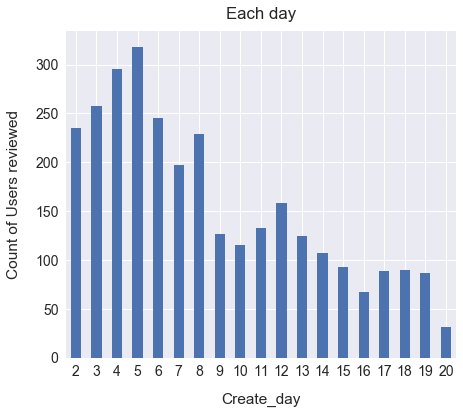

In [84]:
#distribution of number of reviews on each day
sns.set(font_scale=1.4)
lionking_dt["Create_day"].value_counts().sort_index().plot(kind='bar',figsize=(7, 6), rot=0)

plt.xlabel("Create_day", labelpad=14)
plt.ylabel("Count of Users reviewed", labelpad=14)
plt.title("Each day", y=1.02);

In [85]:
#frequency distribution with respect to target
pd.crosstab(lionking_dt.Create_day, lionking_dt.sentiment)

sentiment,0,1
Create_day,,
2,72,163
3,85,173
4,70,226
5,87,231
6,58,187
7,59,138
8,57,172
9,31,96
10,34,81


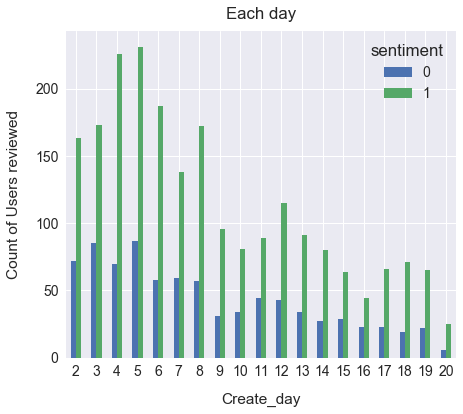

In [86]:
sns.set(font_scale=1.4)
pd.crosstab(lionking_dt.Create_day, lionking_dt.sentiment).plot(kind="bar",figsize=(7, 6), rot=0)

plt.xlabel("Create_day", labelpad=14)
plt.ylabel("Count of Users reviewed", labelpad=14)
plt.title("Each day", y=1.02);

Here the day is just the date so since it is in int64 format and it only consists of 19 levels we convert the feature into categorical entity

In [88]:
#converting the object data type into category
lionking_dt['Create_day'] = lionking_dt['Create_day'].astype("category")

In [89]:
#data types of all the features
lionking_dt.dtypes

review                           object
displayName                      object
displayImageUrl                  object
isVerified                         bool
isSuperReviewer                    bool
hasSpoilers                        bool
hasProfanity                       bool
createDate          datetime64[ns, UTC]
updateDate          datetime64[ns, UTC]
score                           float64
timeFromCreation                 object
user.userId                      object
user.realm                       object
user.displayName                 object
user.accountLink                 object
sentiment                         int32
Create_day                     category
create_time                      object
created_hour                      int64
created_minute                    int64
created_seconds                   int64
update_day                        int64
update_time                      object
updated_hour                      int64
updated_minute                    int64


In [90]:
#significance with our target variable
cramers_v(lionking_dt.Create_day, lionking_dt.sentiment)

0.018486793094565364

Here we can see that create date has decreasing trend in the rate of reviews given on each day as the days go by. So its better to extract reviews during the initial days itself so that number of reviews will be more and also the moview tickets selling company need not go through all the later reviews as they can figure ut the trend of the movie in the people from inital days itself.

*******************************

## created_hour , Updated _hour, created_minutes, updated_minutes,created_seconds, updated seconds

In [91]:
#frequency distribution
lionking_dt["created_hour"].value_counts()

3     239
0     186
23    184
1     173
4     171
2     156
14    156
20    149
22    135
15    129
13    127
16    126
19    123
18    123
21    122
17    121
12    113
5      99
11     94
6      76
10     67
8      48
7      47
9      36
Name: created_hour, dtype: int64

In [92]:
# no of unique values
lionking_dt["created_hour"].nunique()

24

In [93]:
#missing values
lionking_dt["created_hour"].isna().sum()

0

In [94]:
#data type
lionking_dt["created_hour"].dtypes

dtype('int64')

Here the hour is related to time, so since it is in int64 format and it only consists of 24 levels we convert the feature into categorical entity

In [95]:
#distribution with respect to target 
pd.crosstab(lionking_dt.created_hour, lionking_dt.sentiment)

sentiment,0,1
created_hour,,
0,46,140
1,48,125
2,45,111
3,52,187
4,44,127
5,29,70
6,31,45
7,15,32
8,16,32


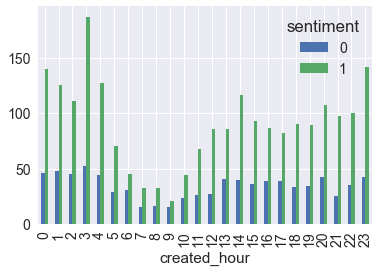

In [96]:
#distribution with respect to sentiment 
pd.crosstab(lionking_dt.created_hour, lionking_dt.sentiment).plot(kind="bar")

In [97]:
#convertion of data type into category
lionking_dt['created_hour'] = lionking_dt['created_hour'].astype("category")

In [98]:
#significance with respect to target
cramers_v(lionking_dt.created_hour, lionking_dt.sentiment)

0.04210163358405138

In [99]:
#frequency  of the distributiom
lionking_dt["created_minute"].value_counts()

33    66
9     66
22    64
38    63
24    63
21    62
32    61
25    59
10    58
3     57
12    57
18    57
8     57
17    57
51    56
6     56
14    56
11    55
59    55
26    54
55    53
40    52
34    52
56    51
23    51
35    51
16    50
5     50
50    50
48    50
43    50
27    49
20    49
15    49
28    48
29    48
36    47
0     47
54    47
57    47
58    46
41    46
30    46
19    46
13    44
4     44
31    44
7     44
45    43
47    43
49    43
46    43
2     42
39    41
37    38
52    37
53    37
44    36
42    35
1     32
Name: created_minute, dtype: int64

In [100]:
#no of unique values
lionking_dt["created_minute"].nunique()

60

In [101]:
#missing values
lionking_dt["created_minute"].isna().sum()

0

In [102]:
#data type
lionking_dt["created_minute"].dtypes

dtype('int64')

In [103]:
#distribution with respect to the target
pd.crosstab(lionking_dt.created_minute, lionking_dt.sentiment)

sentiment,0,1
created_minute,,
0,12,35
1,8,24
2,12,30
3,14,43
4,8,36
5,11,39
6,23,33
7,6,38
8,13,44


In [104]:
#significance in predicting target
cramers_v(lionking_dt.created_minute, lionking_dt.sentiment)

0.0

In [105]:
#frequency distribution
lionking_dt["created_seconds"].value_counts()

40    62
3     61
37    61
25    60
55    58
44    57
18    56
29    56
1     55
12    55
43    55
46    55
15    53
10    53
22    53
0     53
5     52
16    52
32    52
24    52
14    52
8     52
47    52
17    51
36    51
49    51
42    51
6     51
48    51
50    51
28    51
7     51
33    50
34    50
57    49
27    49
2     49
56    48
19    48
39    48
35    48
11    48
51    48
23    48
30    48
52    48
59    47
54    46
45    46
4     45
13    44
21    44
38    43
20    43
9     43
58    42
26    39
41    39
53    39
31    35
Name: created_seconds, dtype: int64

In [106]:
#unique values
lionking_dt["created_seconds"].nunique()

60

In [108]:
#missing values
lionking_dt["created_seconds"].isna().sum()

0

In [109]:
#data type
lionking_dt["created_seconds"].dtypes

dtype('int64')

In [110]:
#distribution with respect to the target
pd.crosstab(lionking_dt.created_seconds, lionking_dt.sentiment)

sentiment,0,1
created_seconds,,
0,16,37
1,14,41
2,13,36
3,20,41
4,8,37
5,14,38
6,18,33
7,12,39
8,11,41


In [111]:
#correlation
lionking_dt['created_seconds'].corr(lionking_dt['updated_seconds'])

0.9194071248703911

In [112]:
#correlation
lionking_dt['created_hour'].corr(lionking_dt['updated_hour'])

0.9802516004935589

In [113]:
#correlation
lionking_dt['created_minute'].corr(lionking_dt['updated_minute'])

0.964082470730291

From the create and update of seconds , minutes and hours we can clear see that there is no evident trend and also the create features are highly correlated with update features. 

In [114]:
#dropping he attributes wich are not carrying much information that will help in predicting the target 
lionking_dt=lionking_dt.drop(labels=['created_seconds','updated_seconds','created_hour','updated_hour','created_minute','updated_minute'], axis=1)

backup -4

In [115]:
#lionking_dt.to_csv("backup_4.csv",header=True,index=False)

In [116]:
#lionking_dt=pd.read_csv("backup_4.csv")

## Lets check for difference between updatedate and creationdate

## Review_update_date

In [117]:
#converting into data time object
lionking_dt["updateDate"]=pd.to_datetime(lionking_dt['updateDate'])

In [118]:
##converting into data time object
lionking_dt["createDate"]=pd.to_datetime(lionking_dt['createDate'])

In [119]:
#extracting new feature with respect to the update date  and creation data
lionking_dt["review_update_date"]=lionking_dt["updateDate"]-lionking_dt["createDate"]

In [120]:
#frequency distribution
lionking_dt["review_update_date"].value_counts()

0 days 00:00:00           2682
0 days 00:00:00.008000       3
0 days 00:00:00.110000       2
0 days 00:00:00.006000       2
0 days 00:00:00.003000       2
                          ... 
0 days 00:00:03.387000       1
0 days 00:00:01.086000       1
0 days 00:00:28.734000       1
0 days 00:00:37.694000       1
2 days 13:59:49.609000       1
Name: review_update_date, Length: 311, dtype: int64

In [121]:
# all the reviews with no updates are labeled as 0 and others who pdated are labeled as 1
lionking_dt["review_update_date"]=np.where((lionking_dt['review_update_date']>'00:00:00'),1,0)

In [122]:
# frequency  distribution
lionking_dt["review_update_date"].value_counts()

0    2685
1     315
Name: review_update_date, dtype: int64

In [123]:
#distribution with respect to sentiment
pd.crosstab(lionking_dt.review_update_date, lionking_dt.sentiment)

sentiment,0,1
review_update_date,,
0,702,1983
1,121,194


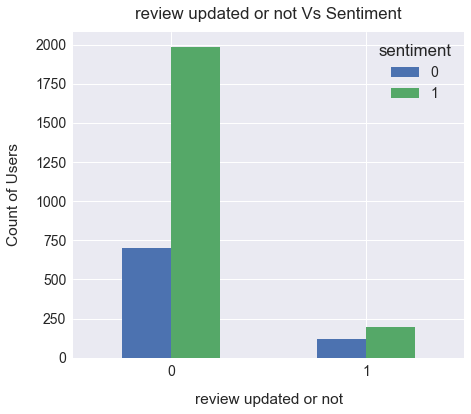

In [124]:
#distribution with respect to our target
sns.set(font_scale=1.4)
pd.crosstab(lionking_dt.review_update_date, lionking_dt.sentiment).plot(kind="bar",figsize=(7, 6), rot=0)
plt.xlabel("review updated or not", labelpad=14)
plt.ylabel("Count of Users", labelpad=14)
plt.title("review updated or not Vs Sentiment", y=1.02);

In [125]:
## how much does this feature related to our target attribute
cramers_v(lionking_dt.review_update_date, lionking_dt.sentiment)

0.08104847691332497

1. Since we extracted a new feature from the create date and update date  we can remove the create date and update date as they  both are highly correlated with each other and also they both have given less relation with our target attribute. 

2. we removed these two features as they both have a unique importance that a movie website can extract that we have mentioned before, which is they can help in extraction during initial movie released dates as most people are excited to give their reviews weather positive or negative

## userid 

In [126]:
# frequency distribution
lionking_dt["user.userId"].value_counts()

978187797                               1
978132996                               1
15509a40-4811-4d42-a2a5-64b918cd2e39    1
3F215415-6E89-445A-B75B-B0B5D71D3680    1
0F1B90A7-492C-442C-82F3-AF765B560A41    1
                                       ..
23B2368D-E073-4AA7-BB0B-00632B00C558    1
49990989-4861-43DB-82DE-19251618A26D    1
978201768                               1
72A2ADB9-278D-48EA-855B-D8E1B58F3FF3    1
1a84e6f9-ab99-419c-b472-ffa6659f9905    1
Name: user.userId, Length: 3000, dtype: int64

In [127]:
#unique values
lionking_dt["user.userId"].nunique()

3000

In [128]:
#dropping the userid feature
lionking_dt=lionking_dt.drop(labels=['user.userId'], axis=1)

There are 3000 unique values so most probably there will be no help from this feature in the quest for our target feature.

*******************

## realm

In [129]:
#frequency distribution 
lionking_dt["user.realm"].value_counts()

Fandango    2379
RT           621
Name: user.realm, dtype: int64

In [130]:
#no of unique values
lionking_dt["user.realm"].nunique()

2

In [131]:
#distribution table with respect to target
pd.crosstab(lionking_dt["user.realm"], lionking_dt.sentiment)

sentiment,0,1
user.realm,,
Fandango,472,1907
RT,351,270


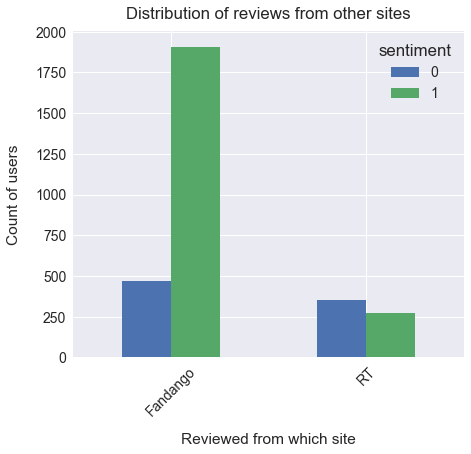

In [132]:
#distribution in bar plot
sns.set(font_scale=1.4)
pd.crosstab(lionking_dt["user.realm"], lionking_dt.sentiment).plot(kind="bar",figsize=(7, 6), rot=45)

plt.xlabel("Reviewed from which site", labelpad=14)
plt.ylabel("Count of users", labelpad=14)
plt.title("Distribution of reviews from other sites", y=1.02);


In [133]:
#significance with respect in predicting our target variable
cramers_v(lionking_dt["user.realm"], lionking_dt.sentiment)

0.3317202865164956

This feature has given 33% of is relation wit our target variable which is less but can give us a slight edge if we use it correctly during our model building or later duing the improvement,

### Here we can find an insight that  most of the revies are coming from the site fandango so other websites can learn about thing or two about their success in attracting users and also the way they are giving reviews is also a thing which i find might be a easy way.

**********

## AccountLink

In [134]:
# frequency distribution 
lionking_dt["user.accountLink"].value_counts()

/user/id/912176906    1
/user/id/978185053    1
/user/id/978139766    1
/user/id/260188359    1
/user/id/977588941    1
                     ..
/user/id/880296241    1
/user/id/963177880    1
/user/id/977836692    1
/user/id/978196227    1
/user/id/977258946    1
Name: user.accountLink, Length: 621, dtype: int64

In [135]:
#unique values
lionking_dt["user.accountLink"].nunique()

621

In [136]:
#data type
lionking_dt["user.accountLink"].dtypes

dtype('O')

In [137]:
#dropping this feature
lionking_dt=lionking_dt.drop(labels=['user.accountLink'], axis=1)

1. Here they are 621 records  with account links and other records have no account link so there is no much information for the extraction by the mvie ticket selling sites or it doesnt help us in predicting target

In [138]:
#lionking_dt.to_csv("backup_reviewBefore.csv",header=True,index=False)

In [139]:
#lionking_dt=pd.read_csv("backup_reviewBefore.csv")

# Text review EDA

In [140]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [141]:
#type of data
type(lionking_dt["review"])

pandas.core.series.Series

In [142]:
#seeing the first two reviews
lionking_dt["review"][:2]

0    technically wonderful but the story needed a l...
1                      Loved it nothing I didn’t liked
Name: review, dtype: object

In [143]:
#removing special characters from the review data and assigning it to a new column feature review_processed_1
lionking_dt['review_processed_1']=[re.sub(r"[^a-zA-Z#\s]",' ',i)for i in lionking_dt["review"]]

In [144]:
lionking_dt.review_processed_1[2323]

'The      Lion King was the first movie I saw at a movie theater  I was   years old   I ve been looking forward to seeing the      rendition and was impressed  I loved how realistic the graphics were  how the movie respected and kept to the      version  and the music   well done '

In [145]:
lionking_dt['review_processed_1'][1121]

'For it being a live action it was well done  \nAs for it being a live action if a film that Ive cherished since my youth it lacked  I was hoping for more dialogue from Rafiki there were some voice matching that just didnt fit  In our opinion some of the characters were not as well depicted or attributes were lacking'

In [146]:
#converting all the upper case letters to lower case after stripping
lionking_dt['review_processed_1']=[each_review.strip().lower() for each_review in lionking_dt['review_processed_1']]
lionking_dt['review_processed_1'][1121]

'for it being a live action it was well done  \nas for it being a live action if a film that ive cherished since my youth it lacked  i was hoping for more dialogue from rafiki there were some voice matching that just didnt fit  in our opinion some of the characters were not as well depicted or attributes were lacking'

In [147]:
lionking_dt.review_processed_1[2323]

'the      lion king was the first movie i saw at a movie theater  i was   years old   i ve been looking forward to seeing the      rendition and was impressed  i loved how realistic the graphics were  how the movie respected and kept to the      version  and the music   well done'

In [148]:
#removing stopwords in the review text
stop = stopwords.words('english')
lionking_dt['review_processed_1']=lionking_dt['review_processed_1'].apply(lambda x: ' '.join([i for i in x.split() if (len(i)>3)&(i.lower() not in stop)]))

In [149]:
lionking_dt.review_processed_1[2323]

'lion king first movie movie theater years looking forward seeing rendition impressed loved realistic graphics movie respected kept version music well done'

In [150]:
lionking_dt['review_processed_1'][1121]

'live action well done live action film cherished since youth lacked hoping dialogue rafiki voice matching didnt opinion characters well depicted attributes lacking'

In [151]:
#splitting the words into root form
lionking_dt['review_processed_1']= lionking_dt['review_processed_1'].apply(lambda x: x.split())

In [152]:
lionking_dt['review_processed_1'][2323]

['lion',
 'king',
 'first',
 'movie',
 'movie',
 'theater',
 'years',
 'looking',
 'forward',
 'seeing',
 'rendition',
 'impressed',
 'loved',
 'realistic',
 'graphics',
 'movie',
 'respected',
 'kept',
 'version',
 'music',
 'well',
 'done']

In [153]:
#converting words into rootform by lemmatizing
import nltk
lmtzr = nltk.stem.WordNetLemmatizer()
lionking_dt['review_processed_1']=lionking_dt['review_processed_1'].apply(lambda x: [lmtzr.lemmatize(i) for i in x])

In [154]:
lionking_dt['review_processed_1'][2323]

['lion',
 'king',
 'first',
 'movie',
 'movie',
 'theater',
 'year',
 'looking',
 'forward',
 'seeing',
 'rendition',
 'impressed',
 'loved',
 'realistic',
 'graphic',
 'movie',
 'respected',
 'kept',
 'version',
 'music',
 'well',
 'done']

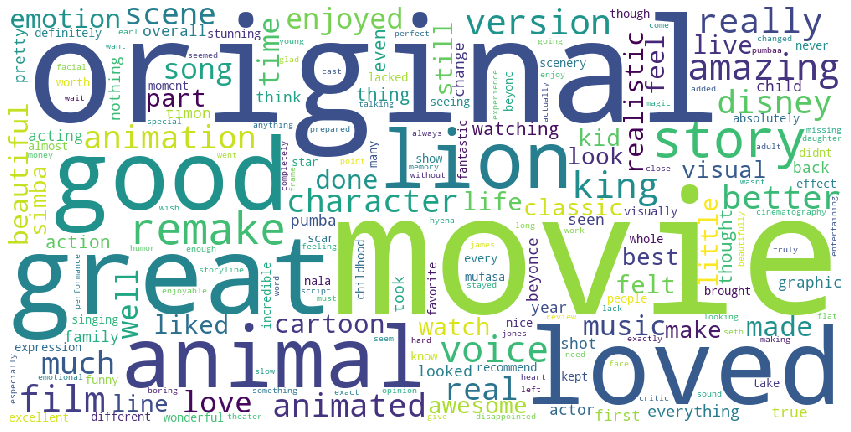

In [158]:
### word cloud on all the reviews
from wordcloud import WordCloud
#convert list to string and generate
review_words=' '.join([' '.join(words) for words in lionking_dt['review_processed_1']])
wordcloud = WordCloud(width = 1000,
                      background_color = 'white',
                      height = 500,
                      collocations = False
                     ).generate(review_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

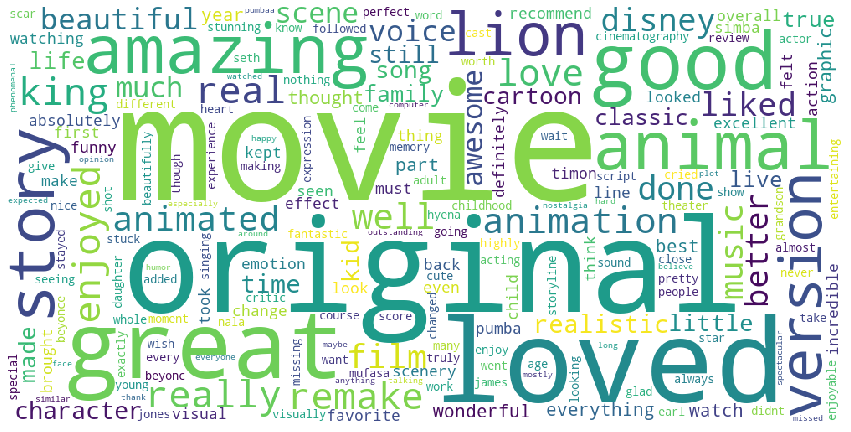

In [161]:
#word cloud for only positive sentiment reviews
from wordcloud import WordCloud
#convert list to string and generate
review_positive_words=' '.join([' '.join(words) for words in lionking_dt['review_processed_1'][lionking_dt['sentiment']==1]])
wordcloud = WordCloud(width = 1000,
                      background_color = 'white',
                      height = 500,
                      collocations = False
                     ).generate(review_positive_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

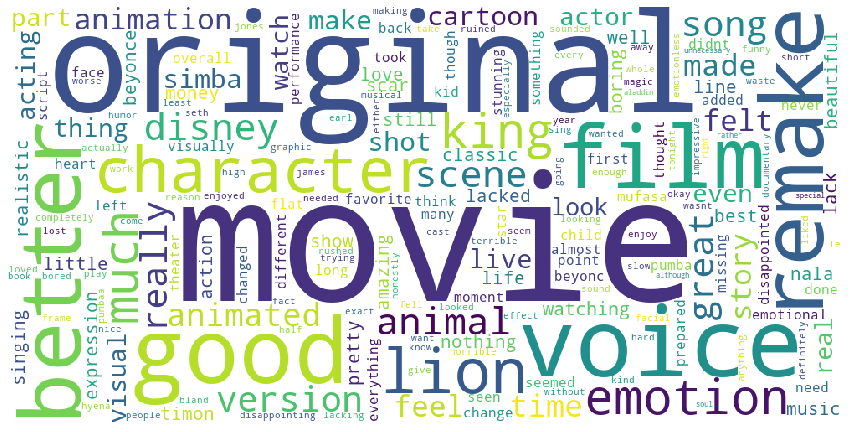

In [162]:
#word cloud for negative sentiment reviews
from wordcloud import WordCloud
#convert list to string and generate
review_negative_words=' '.join([' '.join(words) for words in lionking_dt['review_processed_1'][lionking_dt['sentiment']==0]])
wordcloud = WordCloud(width = 1000,
                      background_color = 'white',
                      height = 500,
                      collocations = False
                     ).generate(review_negative_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

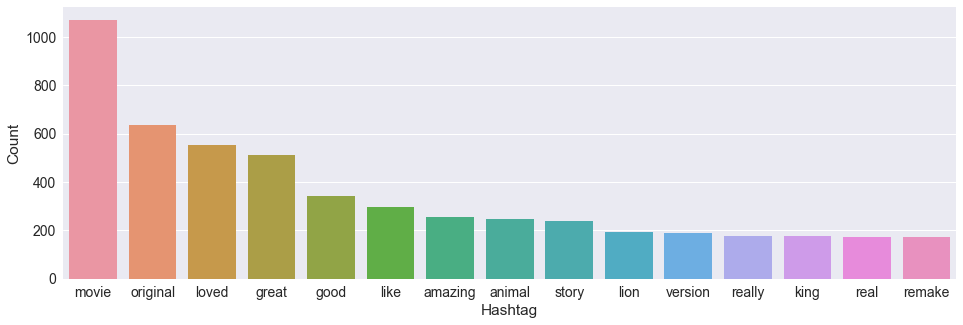

In [163]:
#frequency distribution of positve words
positive_words = nltk.FreqDist(review_positive_words.split(' '))
positive_dt = pd.DataFrame({'Hashtag':list(positive_words.keys()),
                           'Count':list(positive_words.values())})
positive_dt = positive_dt.nlargest(columns='Count',n=15)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=positive_dt,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

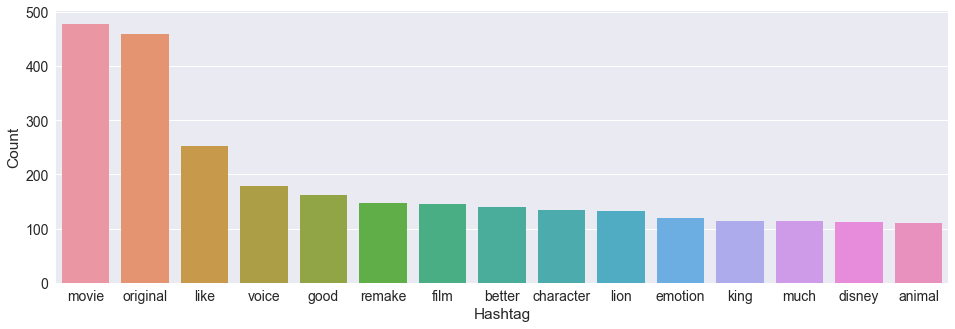

In [164]:
#frequency distribution of negative words
negative_words = nltk.FreqDist(review_negative_words.split(' '))
negative_dt = pd.DataFrame({'Hashtag':list(negative_words.keys()),
                           'Count':list(negative_words.values())})
negative_dt = negative_dt.nlargest(columns='Count',n=15)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=negative_dt,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

### Since above distribution didnt much tell us abt the postive and negative words usage
*****************************************************************************************
                                Ngram-bigram-trigram distribution

In [165]:
CONTRACTION_MAP = {"ain't": "is not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he he will have","he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would","i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have","you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"}

In [166]:
### Contractions
import re


def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
   
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match)\
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)

    return expanded_text


In [167]:
# pre processing of the review data an d assigning it to new feature column review_processed_2
lionking_dt["review_processed_2"] = [expand_contractions(re.sub('’',"'",i)) for i in lionking_dt['review']]

In [168]:
lionking_dt['review_processed_2'][2287]

'Super fun and emotional. Nice version of a classic'

In [169]:
#removing special characters
lionking_dt['review_processed_2']=[re.sub(r"[^a-zA-Z#\s]",' ',i)for i in lionking_dt["review_processed_2"]]
lionking_dt['review_processed_2'][2287]

'Super fun and emotional  Nice version of a classic'

In [170]:
#removing stop words in te review data
lionking_dt['review_processed_2']=lionking_dt['review_processed_2'].apply(lambda x: ' '.join([i for i in x.split() if (len(i)>3)&(i.lower() not in stop)]))
lionking_dt['review_processed_2'][2287]

'Super emotional Nice version classic'

In [171]:
#splitting the words into root form
lionking_dt['review_processed_2']= lionking_dt['review_processed_2'].apply(lambda x: x.split())
lionking_dt['review_processed_2'][2287]

['Super', 'emotional', 'Nice', 'version', 'classic']

In [172]:
#lemmatizing the data words into its root form
lmtzr=nltk.stem.WordNetLemmatizer()
lionking_dt['review_processed_2'] = lionking_dt['review_processed_2'].apply(lambda x: [lmtzr.lemmatize(i) for i in x])
lionking_dt['review_processed_2'][2287]

['Super', 'emotional', 'Nice', 'version', 'classic']

In [173]:
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder ,QuadgramCollocationFinder

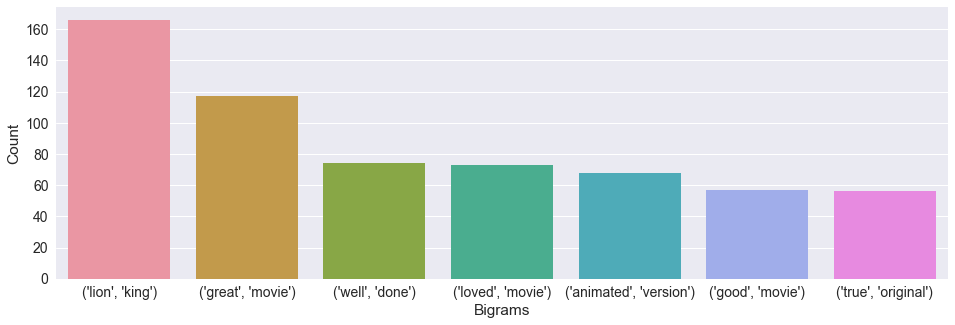

In [174]:
#frequency distribution of bigram-positive-words
positive_words = BigramCollocationFinder.from_words(review_positive_words.split(' ')).ngram_fd
positive_dt = pd.DataFrame({'Bigrams':list(positive_words.keys()),
                           'Count':list(positive_words.values())})
positive_dt = positive_dt.nlargest(columns='Count',n=7)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=positive_dt,x='Bigrams',y='Count')
ax.set(ylabel='Count')
plt.show()

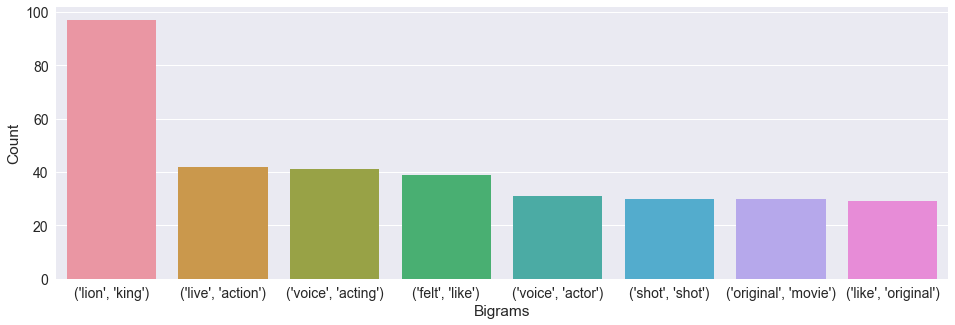

In [175]:
#frequency distribution of bigram-negative-words
negative_words = BigramCollocationFinder.from_words(review_negative_words.split(' ')).ngram_fd
negative_dt = pd.DataFrame({'Bigrams':list(negative_words.keys()),
                           'Count':list(negative_words.values())})
negative_dt = negative_dt.nlargest(columns='Count',n=8)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=negative_dt,x='Bigrams',y='Count')
ax.set(ylabel='Count')
plt.show()

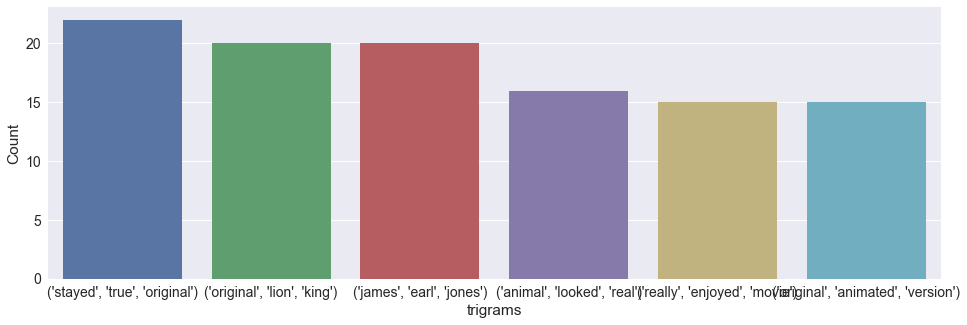

In [176]:
#frequency distribution of trigram-positive-words
positive_words = TrigramCollocationFinder.from_words(review_positive_words.split(' ')).ngram_fd
positive_dt = pd.DataFrame({'trigrams':list(positive_words.keys()),
                           'Count':list(positive_words.values())})
positive_dt = positive_dt.nlargest(columns='Count',n=6)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=positive_dt,x='trigrams',y='Count')
ax.set(ylabel='Count')
plt.show()

# The good things that people are talking about the film are :
    #1. The voice of james earl jones
    #2. The new movie was as it is as the original movie.
    #3. Animation of the movie

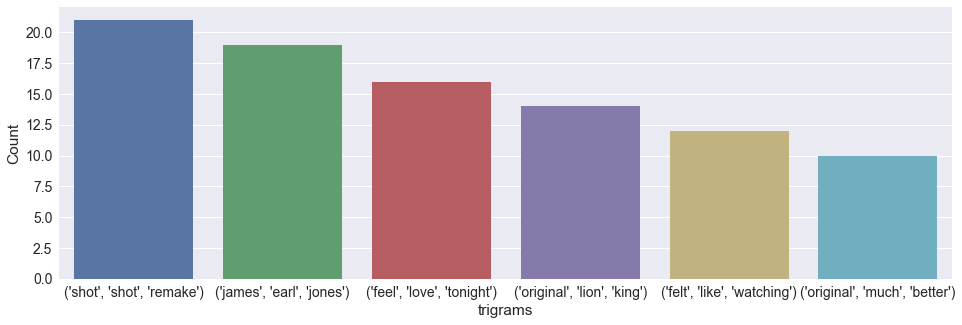

In [178]:

#frequency distribution of trigram-negative-words
negative_words = TrigramCollocationFinder.from_words(review_negative_words.split(' ')).ngram_fd
negative_dt = pd.DataFrame({'trigrams':list(negative_words.keys()),
                           'Count':list(negative_words.values())})
negative_dt = negative_dt.nlargest(columns='Count',n=6)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=negative_dt,x='trigrams',y='Count')
ax.set(ylabel='Count')
plt.show()

In [179]:
## for extracting polarity, review length, word count features from the data after pre processing
from textblob import TextBlob

def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0)', ' ')  
    return Text
lionking_dt['review_processed_3'] = preprocess(lionking_dt['review'])

lionking_dt['polarity'] = lionking_dt['review_processed_3'].map(lambda text: TextBlob(text).sentiment.polarity)
lionking_dt['review_len'] = lionking_dt['review_processed_3'].astype(str).apply(len)
lionking_dt['word_count'] = lionking_dt['review_processed_3'].apply(lambda x: len(str(x).split()))

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


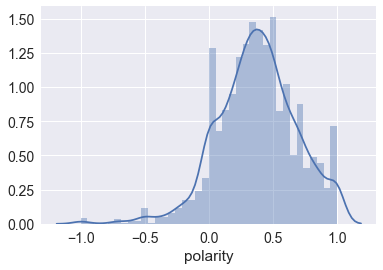

In [180]:
# polarity distribution of the review data
import seaborn as sns
x= lionking_dt.polarity
sns.distplot(x)

In [181]:
## checking for the random reviews with postive polarity
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = lionking_dt.loc[lionking_dt.polarity == 1, ['review_processed_3']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

It was amazing! How'd they do that!!
nostalgically awesome
Wonderful family movie ♥️
Great Movie!! Loved it!!
Awesome job they did with the Lion King!!


In [182]:
## checking for the random reviews with semi positive polarity
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = lionking_dt.loc[lionking_dt.polarity == 0, ['review_processed_3']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Felt like a kid all over again!
Should have used someone else for Nala instead of Beyonce, thats the only thing that didnt work
stick to the orginal
I felt like a kid again. They didn't add anything new.👍
They just made the same movie again


In [183]:
### checking for the random reviews with negative polarity
print('5 reviews with the most negative polarity: \n')
cl = lionking_dt.loc[lionking_dt.polarity <= -0.5, ['review_processed_3']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

Very disappointed  brought my 2 grandkids one fell asleep!
This movie is absurdly bad.
It was really boring , not for kids or teens
hindi dubbing is very bad
Unfortunately I didn't get a chance to watch the movie out of concern for the safety of my grandson. Someone opened the exterior door of the theater about 20 minutes into the movie and I became worried throughout the movie.


In [184]:
!pip install cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [185]:
# review length distribution
lionking_dt['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [186]:
# binning the data on the basis of their length
lionking_dt["review_len_cat"]=pd.cut(bins=[0,150,300,450,600,1000,5000],x=lionking_dt["review_len"],labels=["lessthan150","150-300","300-450","450-600","600-1000","1000-5000"],include_lowest=True)

In [187]:
#contengency table for the distribution based on the sentiment target feature
pd.crosstab(lionking_dt["review_len"],lionking_dt["sentiment"])

sentiment,0,1
review_len,,
15,0,2
19,0,1
20,3,18
21,4,32
22,3,33
23,4,24
24,6,27
25,5,27
26,5,21


1. From the above feature we can see that most of the postive reviews are written in less than 150 words and also the most of the negative reviews are also written in less than words.
2. For simplicity if we want to extract postive or negative reviews we can only go and search for review which are less than 300 for better approximation about the movie and also web movie ticketting sites can also represent the reviews with less no of words for the users to understand quickly abt the movie and also for better distribution.

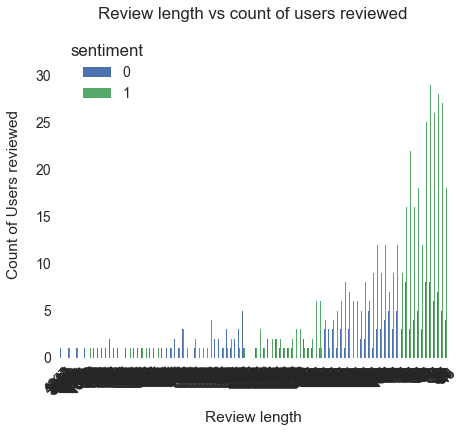

In [188]:
sns.set(font_scale=1.4)
pd.crosstab(lionking_dt.review_len, lionking_dt.sentiment).sort_index(ascending=False).plot(kind="bar",figsize=(7, 6), rot=45)

plt.xlabel("Review length", labelpad=14)
plt.ylabel("Count of Users reviewed", labelpad=14)
plt.title("Review length vs count of users reviewed", y=1.02);

#                             Word Count

In [189]:
#word count distribution
lionking_dt['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Word count',
    linecolor='black',
    yTitle='count',
    title='Review word count Distribution')

In [190]:
# binning the data on the basis of their length
lionking_dt["word_count_cat"]=pd.cut(bins=[0,10,30,50,70,90,110,300,600,1000],x=lionking_dt["word_count"],labels=["lessthan10","10-30","30-50","50-70","70-90","90-110","110-300","300-600","600-1000"],include_lowest=True)

In [191]:
#contengency table for the distribution based on the sentiment target feature
pd.crosstab(lionking_dt["word_count"],lionking_dt["sentiment"])

sentiment,0,1
word_count,,
2,0,12
3,8,43
4,19,124
5,24,129
6,20,148
7,26,125
8,26,97
9,36,105
10,18,93


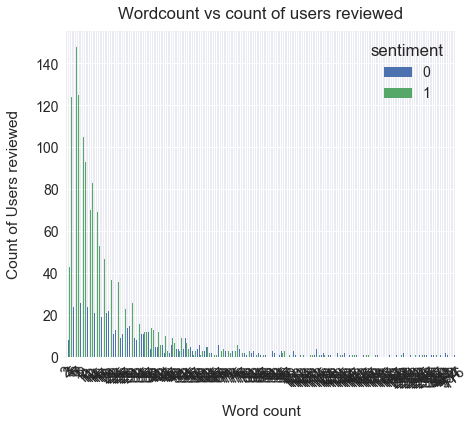

In [192]:
sns.set(font_scale=1.4)
pd.crosstab(lionking_dt.word_count, lionking_dt.sentiment).plot(kind="bar",figsize=(7, 6), rot=45)

plt.xlabel("Word count", labelpad=14)
plt.ylabel("Count of Users reviewed", labelpad=14)
plt.title("Wordcount vs count of users reviewed", y=1.02);

In [193]:
## top 20 most occured positive words from this movie review along with their distribution
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(lionking_dt['review'][lionking_dt['sentiment']==1], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

movie 1035
original 632
loved 552
great 511
good 341
like 293
amazing 255
story 236
animals 228
just 202
version 187
really 178
king 177
real 174
lion 173
enjoyed 169
love 158
animation 151
remake 149
animated 146


In [194]:
### top 20 most occured negative words from this movie review along with their distribution
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(lionking_dt['review'][lionking_dt['sentiment']==0], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

original 454
movie 443
like 253
just 224
good 162
better 140
film 133
voice 133
remake 123
didn 117
did 115
lion 114
king 114
disney 113
characters 112
great 101
really 99
animals 96
animated 95
version 95


In [195]:
#lionking_dt.to_pickle("f1.csv")

In [196]:
#lionking_dt=pd.read_csv("eda_end.csv")

# My insights into the review data of 3000 users are :
    
    1. From reviews
        1.For movie makers: We can pre process the text data and can find out what people are liking or disliking from the movie and and extract the most commnly used keywords in positive review and negative review s which later can be used to extract postive alone or negativee alone. this could help the makers of the movie in knowing about the reach movie has made.
        2.For movie ticket selling sites they can only extract those informations from the reviews using the keywords from n-grams so that they can portray positive reviews in head of their review section to attrat customers to buy tickets
        3.Review length is also  an important feture as the count of the words can tell the majority of the stry regarding the positivity  or the negativity
        4.word count also plays the same role in the figuring out of the data whether it is a positive or negative review
        5.polarity of the feature gives us the scope regarding the threshold that we can set for the retrieval of the data for being poitive or the negativee 
        6. Movie review should always have a upper cap for the limit of words to be used so that reviewer triesto give the apte review abot the story and which will give us better key words without repeating the same in the positive and negative.
        7.movie ticketting sites also has to provide easy option for the user who booked ticket from their sites to change their review as easily as possible as from the above data of 3000 there are less than 15% of the people who updated their original review. 